 <h1><center>Tarea Entendiendo Jupyter Lab, Github, Python y Regresión Lineal</center></h1>
Cesar Augusto Tocora Rubio

## Introducción <a name="id1"></a>
Esta técnica usada para modelares, predecir e interpretar un fenómeno de la naturaleza donde se mezcla, de forma adecuada, modelos deterministicos y estocásticos.
En este modelo se asume que una variable aleatoria, llamada respuesta, está determinada por la combinación lineal de otras variables regresoras y un error que tiene una distribucion, lo que permite herramientas de dos diciplinas, estadística y matemáticas, que enriquecen nuestro conocimiento del fenomeno natural.


"Veremos que es adecuado cuando se agregan regresoras, es el insesgado de minima varianza, y es validable el modelo"

**Índice**   
1. [Introducción](#id1)
2. [Breve historia](#id2)
3. [El planteamiento del algortimo](#id3)
3. [Desarrollar un ejemplo de regresión lineal](#id4)
4. [Conclusiones](#id5)

## Breve historia<a name="id2"></a>
El problema de modelamiento para las orbitas de los planetas, propuesto por Legendre en 1805 y por Gauss en 1809, fueron los prologos para el inicio de esta metodología donde inicialmente se plantaba como minimos cuadrados, sin embargo, fue Francis Galton quien uso el termino REGRESIÓN en el siglo XIX para describir que las alturas de los descendientes de ancestros altos, tienden a regresar hacia abajo, posteriormente su trabajo se extendio a una generalización mas amplia por Udny Yule y Karl Pearson. Quien supone una una distribución Gaussiana condicionada para la variable respuesta es Ronald Fisher pero la distribución conjunta de las variables no necesariamente adquieren esta caracteristica, la cual está asociada de mejor manera a la metodología de Gauss. [Profundizar acá](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n#:~:text=El%20t%C3%A9rmino%20%22regresi%C3%B3n%22%20fue%20acu%C3%B1ado,como%20regresi%C3%B3n%20hacia%20la%20media%20).
).

<div>
<p style = 'text-align:center;'>
<a href="http://www.matematicasdigitales.com/billetes-matematicos/">
<img src="http://www.matematicasdigitales.com/wp-content/uploads/Billete-Gauss-1024x506.jpg" alt="JuveYell" width="300px">
</p>
</div>

## Construyendo el modelo<a name="id3"></a>
En el ejemplo mas simple, regresión lineal simple, una variable aleatoria $Y$, que llamaremos respuesta, está determinada por la combinacion lineal de un conjunto de variables $X$, ya observadas, que llamaremos regresoras, Esta relacion está determinada por:

$$Y= \beta_{0}+\beta_{1}X_{j}+ \varepsilon_{j}$$

Con las condiciones:

1. $Y$ es una variable aleatoria
2. $x$ es una variable Deterministica
3. $\varepsilon_{j} \sim N(0,\sigma)$
4. $\beta_{0}, \beta_{1}$ son constantes reales
5. $cov(\varepsilon_{i} ,\varepsilon_{j}=0)$ si $i\neq j$


Con estas restricciones nuestro interes es calcular $\beta_{0}, \beta_{1}$ restricto a una funcón de maxima verosimilitud de los errores. Tambien se puede demostrar que la estimacion de estos parametros via minimos cuadrados es igual.

Esta estimación es la mas adecuada  en terminos de la varianza por el teorema de Gauss-Márkov [Info aquí](https://es.wikipedia.org/wiki/Teorema_de_Gauss-M%C3%A1rkov). para modelos lineales esta estimacion es la que tiene minima varianza. 

Para análisis del modelo, en terminos de Bondad y ajuste del mismo, es el que presenta mejor ajustes (menor valor) al evaluarlo con los criterios BIC [Info aqui](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_bayesiano), AIC [Info aqu](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike), entre otras, aunque popularmentes se practica con el uso del $R^{2}$ [Info aquí](https://es.wikipedia.org/wiki/Coeficiente_de_determinaci%C3%B3n), que selecciona el modelo de mayor valor, aunque este último puede enmascarar un un defecto del modelo.

## Construyendo el modelo<a name="id4"></a>
A modo ilustrativo se creara un modelo con la metodologia de regresión lineal.

Se toman los datos de emisiones medidas por sensores agregados (promedio o suma) a unaturbina de gas que se encuentra ubicada en el noroeste de Turquíacon el fin de estudiar las emisiones de gases de combustion en una turbina. [Info aqui](https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

path = 'C:/Users/VKVLL/Downloads/Por_Ahora_CT/Big_Data/Datos/pp_gas_emission/gt_2015.CSV'
df = pd.read_csv(path)
df.dtypes
#carga de datos 

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [2]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


Se toma como regresora la variable presión de escape de la turbina de gas (GTEP) mbar, y la respuesta como carbono (CO) mg / m3

In [3]:
#seleccion de variables
cdf = df[['CO','GTEP']]
cdf.head(9)
print()

Se seleccionanel una fracción de los datos como se hace generalmente en el entrenamiento de modelos para provar su eficiencia

In [4]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Se estima el modelo con la sklearn Y se invocanlos valores relevantes a este modelo

In [5]:
#Entrenamiento del modelo
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['GTEP']])
train_y = np.asanyarray(train[['CO']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.27520389]]
Intercept:  [10.3194222]


Text(0,0.5,'CO')

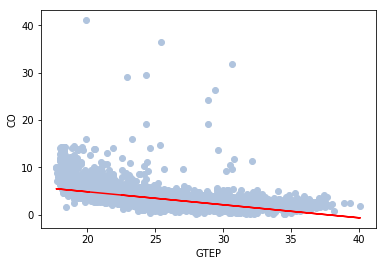

In [6]:
plt.scatter(train.GTEP, train.CO,  color='lightsteelblue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("GTEP")
plt.ylabel("CO")

La gráfica suguiere una relación inversa (por cada unidad de aumento en la presión disminuye 0.2 unidades de CO) en la presion de escape de la turbina y la emision de carbono aunque se observan, aunque existen algunos valores que suguieren una dispersion que se envuentra ligada a otros factores.

In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['GTEP']])
test_y = np.asanyarray(test[['CO']])
train_y_hat = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_hat - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y_hat - train_y) ** 2))
print("R2-score: %.2f" % r2_score(train_y , train_y_hat) )

Mean absolute error: 1.16
Residual sum of squares (MSE): 3.60
R2-score: 0.30


## Opcion 2 para la estimacion
Se estima el modelo con la libreria statsmodels, para obtener resultados que son de interes comun para los modelos estadísticos

In [8]:
#Regresion con el paquete statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(train_x, prepend=True)
modelo = sm.OLS(endog=train_y, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2495.
Date:                Wed, 17 Mar 2021   Prob (F-statistic):               0.00
Time:                        09:46:19   Log-Likelihood:                -12262.
No. Observations:                5953   AIC:                         2.453e+04
Df Residuals:                    5951   BIC:                         2.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3194      0.146     70.613      0.0

Las medidas para la descripcion del modelo y validación del modelo son similares con las dos metodologías (paquetes). Ademas se observa que la presion es significativa para este modelo con intercepto , aunque el $R^2$ suguiere un ajuste inadecuado $AIC$ y $BIC$ Suguieren un buen ajuste, y en conjunto con la diferencia de algunas observaciones indican que sea apropiado el agregar mas variables predictoras.

## Cconcluciones<a name="id5"></a>

El modelado de eventos naturales bajo estos modelos parecen ser los mas adecuados ya que conjuntamente integran las propiedades de minimos cuadrados y de los modelos estocasticos, agregando presicion, por lo expuesto en el teorema Gauss-Márkov, y aleatoriedad. 

## Referencias
* [Articulo datos](https://journals.tubitak.gov.tr/elektrik/issues/elk-19-27-6/elk-27-6-54-1807-87.pdf)
* [Datos](https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set)
* [Teoria](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_la_regresi%C3%B3n#:~:text=El%20t%C3%A9rmino%20%22regresi%C3%B3n%22%20fue%20acu%C3%B1ado,como%20regresi%C3%B3n%20hacia%20la%20media%20) 
